Weak Law of Large Numbers (WLLN)

For all $\epsilon > 0, P(|M_n - \mu| \geq \epsilon) = P(|\frac{X_1+...+X_n}{n} - \mu| \geq \epsilon) \to 0$ as $n \to \infty$

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import math

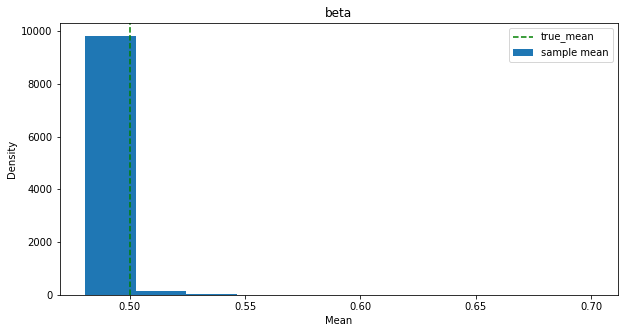

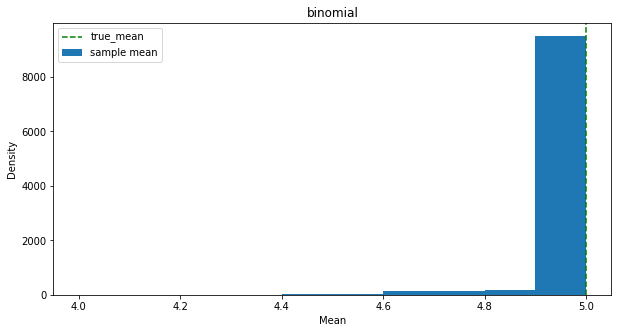

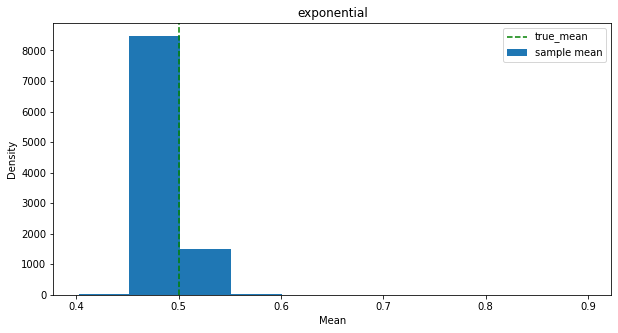

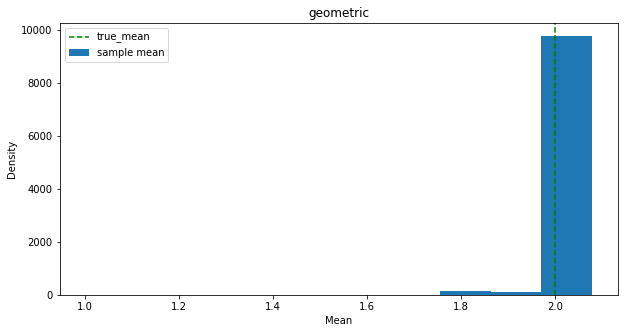

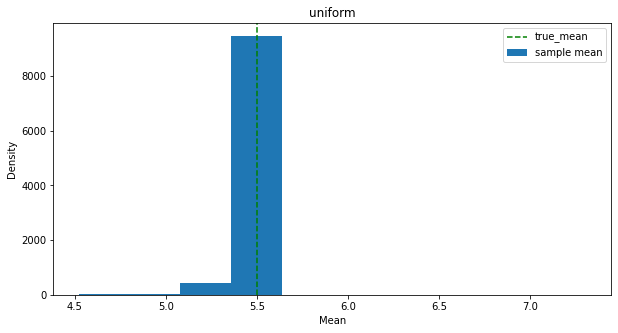

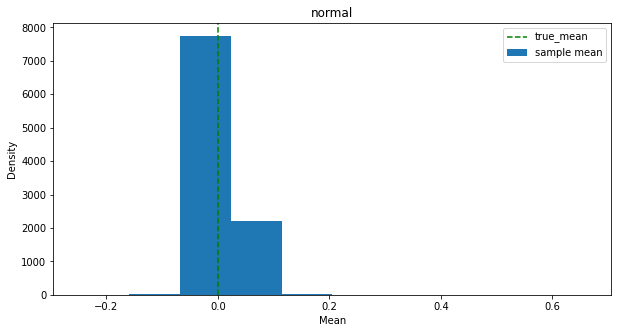

In [176]:
n = 10000
a = b = 2

rv_obs = {'beta': np.random.beta(2, 2, n), # a = b = 2
          'binomial': np.random.binomial(10, 0.5, n), # n = 10, p = 0.5
          'exponential': np.random.exponential(0.5, n), # 1/lambda = 0.5
          'geometric': np.random.geometric(0.5, n), # p = 0.5
          'uniform': np.random.uniform(1, 10, n), # a = 1, b = 10
          'normal': np.random.normal(0, 1, n), # mu = 0, var = 1
         }

true_means = {'beta': 1/2, # mu = a/(a+b)
              'binomial': 5, # mu = np = 10*0.5 = 5
              'exponential': 1/2, # mu = 1/lambda = 1/2
              'geometric': 2, # mu = 1/p = 2
              'uniform': 11/2, # mu = (a+b)/2 = 11/2
              'normal': 0, # mu = 0
              }

for dist in rv_obs:
    sample_means = []
    for i in range(n):
        sample_means.append(np.mean(rv_obs[dist][:i+1]))
    # distribution plot
    plt.figure(figsize=(10, 5))
    plt.title(dist)
    plt.hist(sample_means, label='sample mean', align='mid')
    plt.axvline(x=true_means[dist], color = 'green',linestyle='--', label='true_mean')
    plt.xlabel('Mean')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

**Convergence in probability**

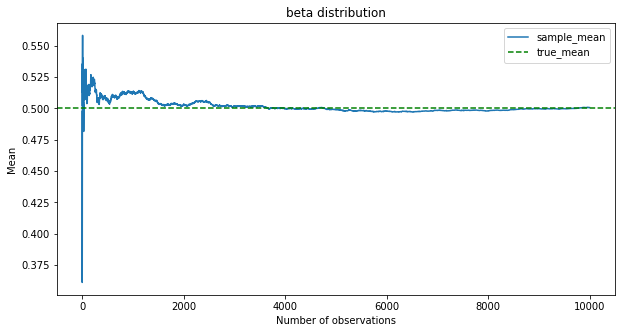

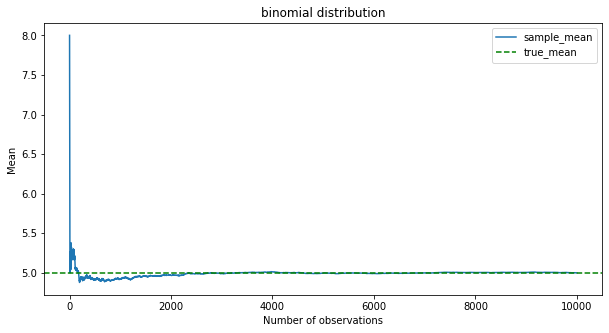

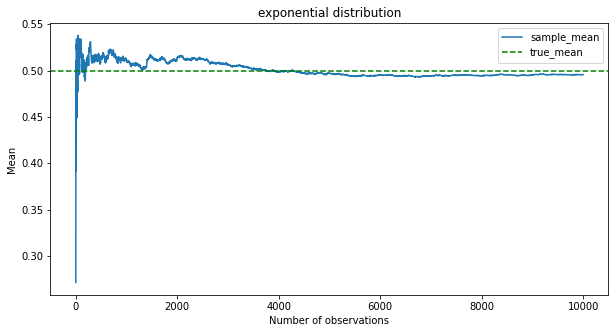

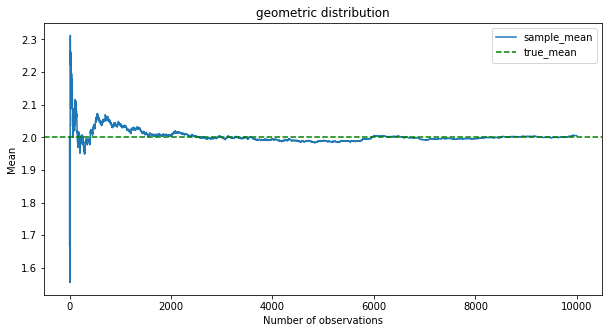

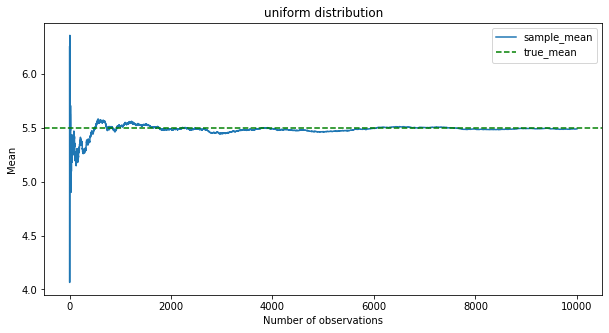

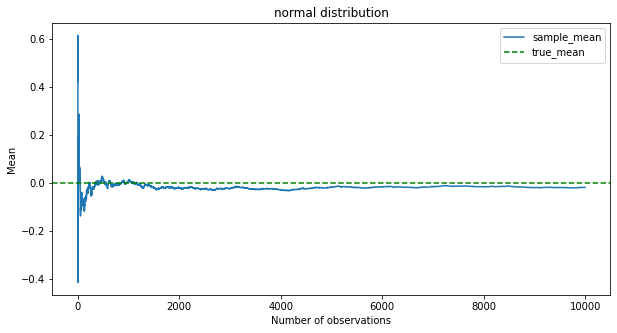

In [173]:
for dist in rv_obs:
    sample_means = []
    for i in range(n):
        sample_means.append(np.mean(rv_obs[dist][:i+1]))
        
    # convergence plot
    plt.figure(figsize=(10, 5))
    plt.plot(sample_means, label='sample_mean')
    plt.axhline(y=true_means[dist], color = 'green',linestyle='--', label='true_mean')
    plt.title('%s distribution' % dist)
    plt.xlabel('Number of observations')
    plt.ylabel('Mean')
    plt.legend()
    plt.show()

**CLT**

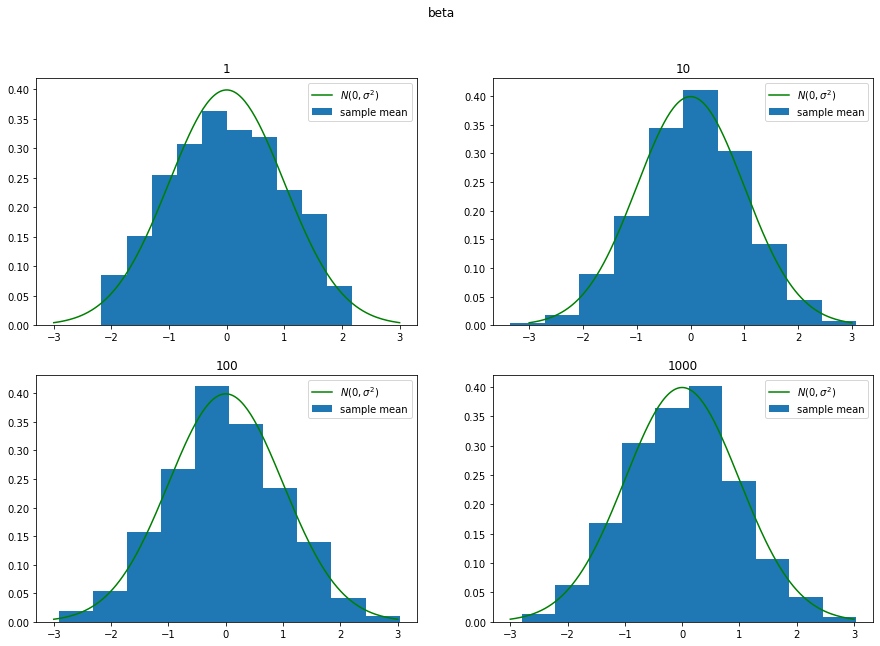

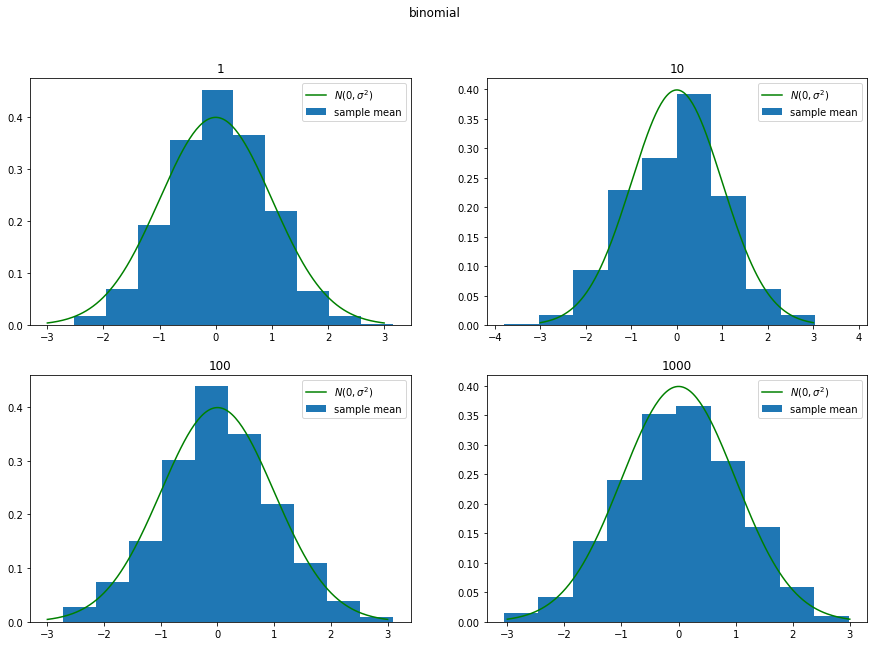

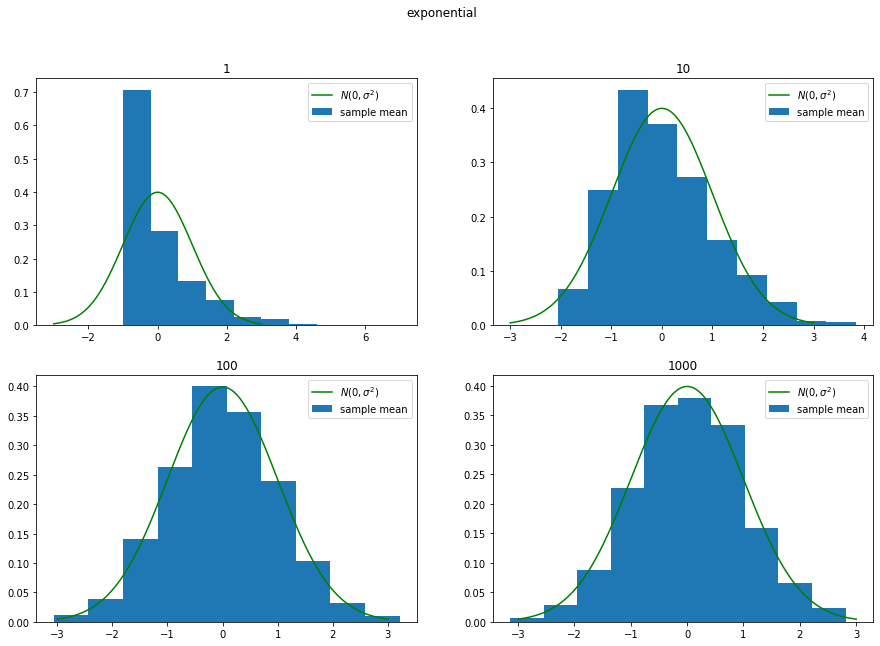

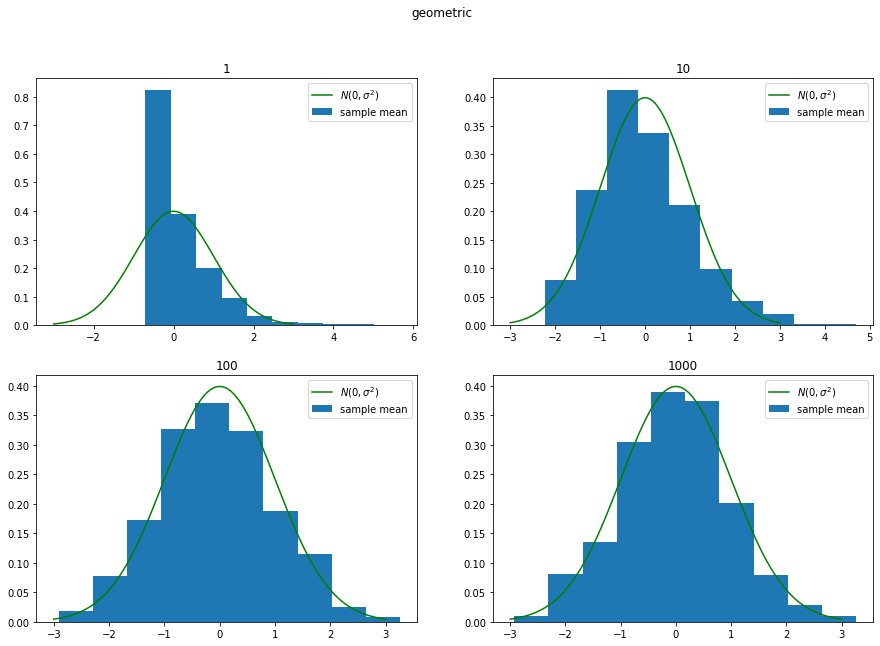

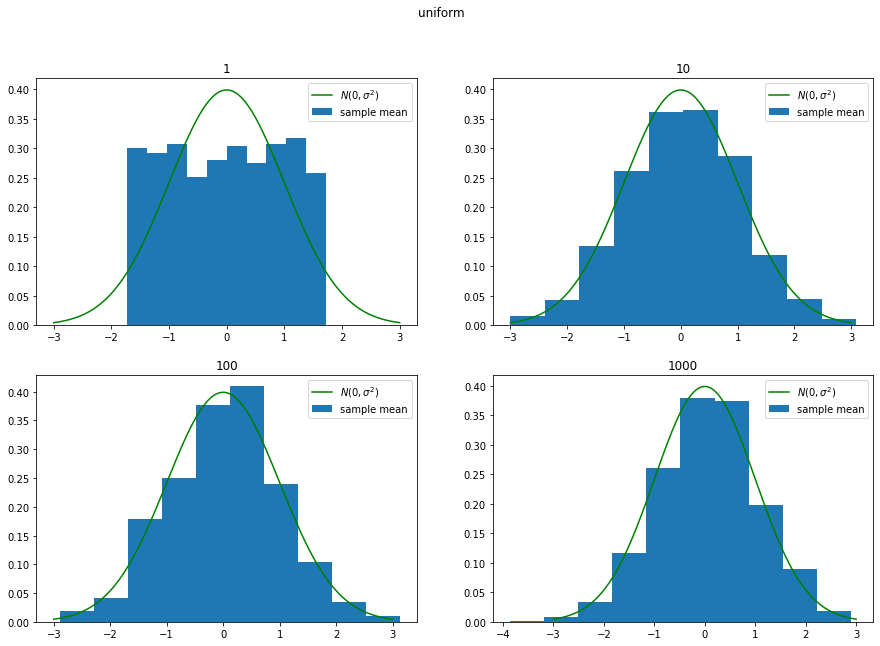

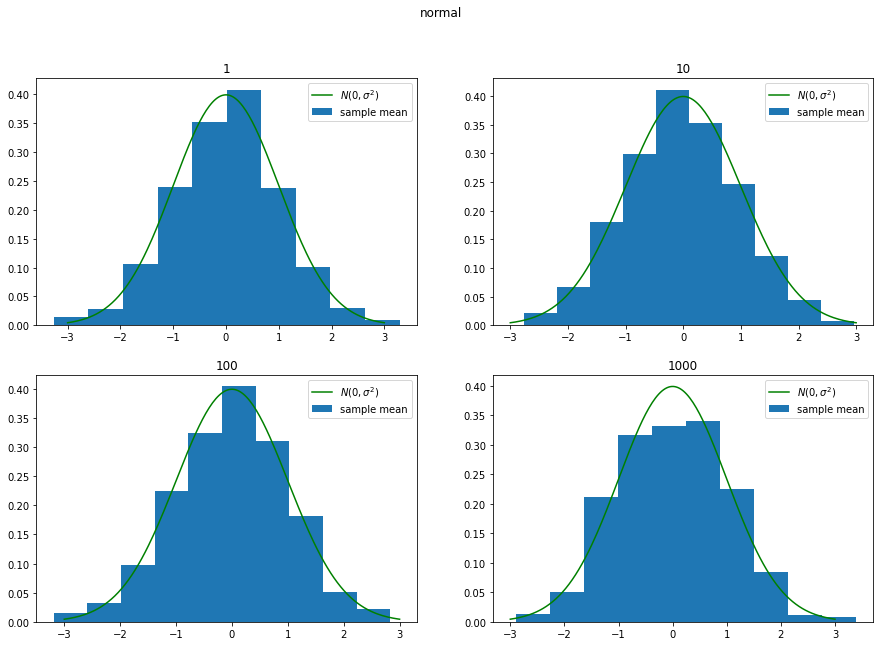

In [177]:
n_vals = [1, 10, 100, 1000]
m = 1000

true_vars = { 'beta': 1/20, # a=2, b=2
              'binomial': 10*0.5*0.5, # n=10, p=0.5
              'exponential': 1/4, # lambda = 1/2
              'geometric': 2, # p=1/2
              'uniform': 81/12, # a=1, b=10
              'normal': 1, # mu = 0
              }

sample_means = {'beta': [],
              'binomial': [],
              'exponential': [],
              'geometric': [],
              'uniform': [],
              'normal': [],
              }

# find sample means for different values of n
for n_val in n_vals:
    sample_means['beta'].append([(np.mean(np.random.beta(2, 2, n_val)) - true_means['beta'])/(math.sqrt(true_vars['beta']))*math.sqrt(n_val) for i in range(0, m)])
    sample_means['binomial'].append([(np.mean(np.random.binomial(10, 0.5, n_val)) - true_means['binomial'])/(math.sqrt(true_vars['binomial']))*math.sqrt(n_val) for i in range(0, m)])
    sample_means['exponential'].append([(np.mean(np.random.exponential(1/2, n_val)) - true_means['exponential'])/(math.sqrt(true_vars['exponential']))*math.sqrt(n_val) for i in range(0, m)])
    sample_means['geometric'].append([(np.mean(np.random.geometric(1/2, n_val)) - true_means['geometric'])/(math.sqrt(true_vars['geometric']))*math.sqrt(n_val) for i in range(0, m)])
    sample_means['uniform'].append([(np.mean(np.random.uniform(1, 10, n_val)) - true_means['uniform'])/(math.sqrt(true_vars['uniform']))*math.sqrt(n_val) for i in range(0, m)])
    sample_means['normal'].append([(np.mean(np.random.normal(0, 1, n_val)) - true_means['normal'])/(math.sqrt(true_vars['normal']))*math.sqrt(n_val) for i in range(0, m)])

for dist in sample_means:
    k = 0
    fig, ax = plt.subplots(2, 2, figsize =(15, 10))
    for i in range(0, 2):
        for j in range(0, 2):
            fig.suptitle(dist)
            ax[i, j].hist(sample_means[dist][k], density = True, label='sample mean')
            ax[i, j].set_title(label = n_vals[k])

            x_grid = np.linspace(-3, 3, 200)
            ax[i, j].plot(x_grid, norm.pdf(x_grid, scale=1), label='$N(0, \sigma^2)$', color='green')
            ax[i, j].legend()
            k = k + 1        
    plt.show()